 --- Below is the Info() --- 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        23 non-null     int64 
 1   Familiarity Level          23 non-null     int64 
 2   Demonstrate Knowledge      23 non-null     bool  
 3   Worry                      23 non-null     object
 4   Opinion: Most Infected     23 non-null     object
 5   Opinion: Belief of Spread  23 non-null     object
 6   Personal Experience        23 non-null     bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 1.1+ KB



 --- Below is the Head() --- 


   Age  Familiarity Level  Demonstrate Knowledge Worry Opinion: Most Infected  \
0   27                  3                   True    No          United States   
1   19                  2                   True    No                  China   
2   22                  2         

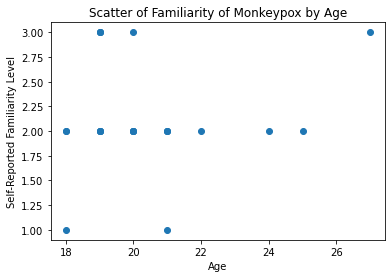

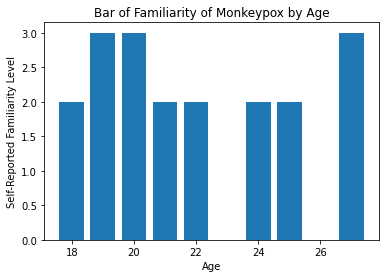

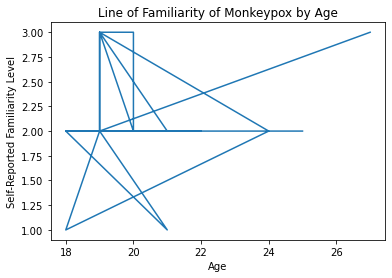

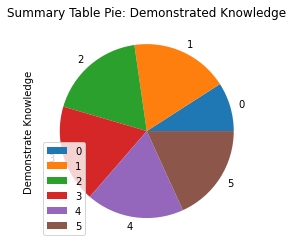

In [3]:
#Nathaniel Brown
#November 23, 2022
#CSC 201 Fall 22'
#Assignment 12: Cleaning, sumarizing and Visualizing dataframes
#Title: Cleaning Summarizing and Visualizign My Dataframe
###
#Description: I will write a modularized python program that reads all the records from the data
# set that I found online into a Pandas Dataframe. visually inspect elements and clean the dataframe
#for common errors, and create summary tables an dvisualizations from the cleaned frames. These
#summary tables and visualizations must be relevant and serve as supporting eveidence to the 
#questions I posed about the topic.
###
#Solution: 
#To successfully complete this program I will start by defining a functoin to read the dataframe from a csv 
#file. From there it will return a variable that can be used for reference to the dataframe. Defined df.
#Next I will create a function that helps me inspect the dataframe to diagnose it for common data errors, 
#as well as recognize aspects of the file that may hinder my ability to analyze it efficiently.
#I will do this by printing a series of commands, such as .info , .head , .tail , .columns , .shape, and .describe
#in relation to both the whole dataframe and specific columns of the data frame. From there I will move on to 
#cleaning the dataframe in a new function. I will define variables that manually adjust the csv file as needed;
#for instance creating a variable that redefines a specific column from a string to an integer. And/or replacing
#empty text wtih a new string. These variables will then need to be returned, so they can be referenced as parameters 
#in the mai nfunction throughout the rest of the assignment. Next, similar to last week; I will create a function
#that wlil get a subset of the data to use in future visualizations and/or summary tables. This will also return a variable for 
#future use. Next I will define a groupby function which allows me to analyze a specific aspect of the cleaned subset and run
#quick calculations on the data for future storytelling in relation to my course theme. The same thing will
#then be done for the pivot table; which will also run a computation. All of these afforementioned functoins
#will return to the main function, which can then be called upon as parameters to help define and print several
#final functions. These final functions will consist of four charts. A Bar, Line, and Scatter which will be passed
#the unfiltered clean dataframe and a final pie chart which will be passed one of the summary tables defined previously
#in the assignment. These visual functions will be called within the main function; the main function will be called and the program
#will execute.
###
##### IMPORTS and Outer Variables#####
import pandas as pd, matplotlib.pyplot as plt, numpy as np   # imports numpy, pandas, matplotlib libraries.
from scipy.stats import linregress   #import linregress library
import csv
##############################
##### READ AS DATAFRAME #####
#this function converts the data in a CSV file to a pandas data frame. 
# Arguments - 1 
# Returns - 1
def read_as_dataframe(masterfile):    #defines function to read csv file and make dataframe for use throughout the assignment. Pushes masterfile for csv reading.
    df = pd.read_csv(masterfile)      # sets variable definition to be returned, dataframe.
    #df = og.astype({"Age":"int"})     
    return df                         #returns df variable, for usage later in the main()

##############################
#### VISUAL INSPECT ####
#This function visually inspects the dataframes to diagnose it for common data errors.
#Arguments - 1 Pandas DataFrame
#Return - None
def visual_inspect(whole):
#info section
    print(" --- Below is the Info() --- \n\n")   #below prints the info of each column, displaying the Non-Null Count and Data Type of each column.
    whole.info()
    print("\n\n")
    print(" --- Below is the Head() --- \n\n") #below prints the first 5 rows of the csv file.
    print(whole.head() , "\n\n")
    print(" --- Below is the Tail() --- \n\n") #below prints the last 5 rows of the csv file.
    print(whole.tail() , "\n\n")
    
    print(" --- Below is a list of Columns() --- \n\n") #below prints a list of each column in the csv file, to manually scan for errors.
    print(whole.columns , "\n\n")
    print(" --- Below is the Shape() --- \n\n")   #Below lists an ordered pair where x = the number of rows, and y = the number of columns in the csv file.
    print(whole.shape , "\n\n")
#value counts section
    print(" --- Below is a Value Count of Opinion: Belief of Spread Column \n\n") #below prints the value counts of 'Belief of Spread' column, displaying a count for each response and identifying blank responses.
    print(whole['Opinion: Belief of Spread'].value_counts(dropna = False) , "\n\n")
#describe section
    print(" --- Below is Description of Age Column \n\n") #Below we describe the age numerical column to identify key statistics relating to the column.
    print(whole['Age'].describe() , "\n\n")
##############################
#### CLEAN DATAFRAME ####
# after visually ispecting, this function will resolve data errors that you found in your inspection.
# You can use any of the techniques to clean data discussed in the lecture such as dropping missing
# values or filling values. Dropping duplicate rows, replacing erroneous data, formatting vlaues, and 
# converting columns to their proper type.
#arguements 1 - Panda Dataframe that is NOT CLEAN
#returns 1 - Panda Dataframe that is cleaned.
def cleaned_dataframe(whole):
    whole["Opinion: Belief of Spread"] = whole["Opinion: Belief of Spread"].str.replace('None' , 'Monkey') # replaces strings of 'none' wtih string of 'monkey'
  #  whole["Age"] = whole["Age"].astype(int) #not necessary, but no column meets this requirement of hte rubric. So here is a demonstration of it.
  #  whole['Familiarity Level'] = whole['Familiarity Level'].astype(int)
    whole['Opinion: Belief of Spread'] = whole['Opinion: Belief of Spread'].astype('category')
    whole['Opinion: Most Infected'] = whole['Opinion: Most Infected'].astype(str)
    print(" --- Below is a print of the cleaned Data Types --- \n\n" , whole.dtypes , "\n\n")
    print(whole)
    return whole
##############################
##### GET SUBSET #####
# Using the cleaned pandas dataframe, create filtered subset to narrow down and perform computations
# on particular information that will serve as supporting evidence to some of the questions posed on the topic.
# Arguements 1 - Dataframe that has been CLEANEd
# Returns 1 - subset of cleaned dataframe.
def get_subset(clean): # defines the functoin to establish a subset, by passing the cleaned csv
    knowledge_sub = clean[clean['Opinion: Belief of Spread'] == 'Skin to Skin']   # establishes a variable that filters the cleaned data frame, by column 'Belief of Spread, filtering only responses that contain the answer ' Skin to Skin' for future computations.
    return knowledge_sub  #returns this variable, for future use.
##############################
#### GROUP BY SUMMARY TABLE ####
# Passing cleaned subset dataframe; creates summary table of data.
# Arguments 1 - Cleaned data subset.... i.e. clean_subset
# returns 1 - Groupby Summary table
def groupby_sum_table(clean_subset): #this function creates a group by summary table, using the cleaned subset data. Filtered by age. Displaying Median ratings for numerical columns.
    groupby_table = clean_subset.groupby('Age' , as_index = False).median() # sets to group by age, and runs median computation as per requirements.
    print("======START======", groupby_table, "=====END=====") #prints previously defined function for ease of confirmation.
    clean_subset.reset_index() #resets the index of the passed argument for future use.
    return groupby_table   #returns the pivot table variable, for future use.
##############################
#### PIVOT TABLE FUNCTION ####
# Passing the cleaned data, create a piv table, that relates to questions posed earlier in the semester. NOTE === NOT THE FILTERED SET; for better storytelling.
# Arguments 1 - Cleaned data subset passed.
# Returns 1 - Piv Summary Table
def piv_sum_table(clean): # This function creates pivot table.
    pivot_table = clean.pivot_table('Age' , index = 'Demonstrate Knowledge' , aggfunc = [np.average] , margins = False) #establishes pivot table variable, with age and demonstrate knowledge columns, then runs an average calculation, and does NOT print a total section.
    print("^^^^START^^^^^^^", pivot_table , "^^^^^END^^^^^^") #prints table for confirmation.
    clean.reset_index() # reset index as per requirements; and for efficiency.
    return pivot_table #returns the previously defined variable for future use.
################# SCATTER VISUAL #################
# this is using cleaned whole dataframe.
def scat_vis(clean):         #def scatter func using cleaned dataframe as parameters defined in main()
    x = clean['Age']    #defines x as the age column of the cleaned csv
    y = clean['Familiarity Level']  #defines y as the familiarity level column of the cleaned csv
    plt.scatter(x , y)            # plots a scatter using the afforementioend defined x, y.
    
    plt.title("Scatter of Familiarity of Monkeypox by Age")  #scatter relevant title
    plt.xlabel("Age") #label for x
    plt.ylabel("Self-Reported Familiarity Level") #label for y
    plt.show() #prints the scatter plot
################# LINE VISUAL #################
# this is used using cleaned whole dataframe
def line_vis(clean): #defines line visual using the cleaned data frame as a parameter defiend in main()
    x = clean['Age']  #defines x as being the age column of the cleaned dataframe
    y = clean['Familiarity Level'] #defines y as familiarity level of the cleaned dataframe
    plt.plot(x , y) #plots the line plot using the afforementioned x and y variables.
    
    plt.title("Line of Familiarity of Monkeypox by Age") #relevant title
    plt.xlabel("Age") # x axis label
    plt.ylabel("Self-Reported Familiarity Level") #y axis label
    plt.show()
################# Bar VISUAL ################# 
#this is used using cleaned whole dataframe
def bar_vis(clean):  #defines a bar visual function using the cleaned data set variable as a parameter, passed from the main()
    x = clean['Age'] #defines x as the age column of the cleaned csv
    heights = clean['Familiarity Level'] #defines heights of the bars to be the familiarity level of the cleaned csv
    plt.bar(x , heights) #plots a bar chart using the afforementioned x and heights variable
    
    plt.title("Bar of Familiarity of Monkeypox by Age") # Relevant title
    plt.xlabel("Age") #x label
    plt.ylabel("Self-Reported Familiarity Level") #y label
    plt.show() #prints the plot
############### SUM TABLE VISUAL ################
# THIS ONE IS USING THE SUM TABLE AS PER REQUIREMENTS # <<<<<<<<<<<
def sum_table_vis(group_table): # defines a summary table visual, in the form of a pie chart. Using the groupby summary table established previously, passed as a parameter through the main()
    group_table.plot.pie(x = "Age" , y = "Demonstrate Knowledge") #link's the group_table variable to the pie plot, in a succinct quick manner. Defining x as the age column and y as the demonstrates knowledge column.
    
    plt.title("Summary Table Pie: Demonstrated Knowledge") #relevant title for the plot.
    
##### MAIN FUNCTION #####
# This function sets up the program and manages calls to functions defined for reading the csv
# file into a pandas dataframe, visually inspects and cleans the dataframe of common data errors,
# and creates summary tables and visualizations from the cleaned dataframe and its filtered subsets.
def main():            #defines main function used to execute the entire program.
    masterfile = "dataframes.csv"      #variable name of csv file used throughout.
    whole = read_as_dataframe(masterfile) #dataframe variable name, equating to the read_as() with passed parameter of the csv file variable.
    visual_inspect(whole)             #calls the visual inspect functoin, passed the 'whole' dataframe file established in the above line.
    clean = cleaned_dataframe(whole)    #calls the clean dataframe function, passing the whole (original csv) into it.
    #print(clean.info() , clean['Age'].info() , clean['Opinion: Belief of Spread'].value_counts(dropna = False))
    clean_subset = get_subset(clean) #establishes variable, that represents the get_subset() function with the passed cleaned dataframe... For use in the filtered data summary table below.
    group_table = groupby_sum_table(clean_subset) #establishes a variable that can be called to create the groupby sum table. (of median numerical data columns)
    pivot_table = piv_sum_table(clean) #establishes pivot table variable as the piv_sum+table function with a passed parameter of hte clean variable defined above.
    scat_vis(clean) #scatter f\unction, passed cleaned dataframe
    bar_vis(clean) # bar, same as above
    line_vis(clean) #line, same as above.
    sum_table_vis(group_table) # Visual passed the groupby_sum_table variable, which is a main requierment of the visual aspect of the assignment.
main()      # as mentioned above runs the main function, essentially starting the program.
    